# Universidad Autónoma de Yucatán

## Facultad de Matemáticas

### Machine Learning

**Teacher:** Dr. Victor Uc Cetina

**Student:** Dayan Bravo Fraga

# Create Animation **(Step 4 of 4)**

## Import libraries

In [15]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Import History Generated

Paste the report number copied from the notebook:
**Generate Artificial Data Points** [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dayan3847/machine_learning/blob/master/stochastic_gradient_descent/colab/1_generate_artificial_data_points.ipynb)

In [3]:
report_number: str = '20230514144011475656'

In [4]:
data_points: np.array = np.loadtxt(f'reports/{report_number}/data_points.csv', delimiter=',').T

In [5]:
print('\033[92m' + 'loading data... ' + '\033[0m')
history_df: pd.DataFrame = pd.read_csv(f'reports/{report_number}/history.csv')
print('\033[92m' + 'data loaded' + '\033[0m')

loading data... 
data loaded


In [6]:
function_str: str = open(f'reports/{report_number}/data_points_base_function.txt', 'r').read()
function: sp.Expr = sp.sympify(function_str)
print('\033[32m' + 'Imported base function:' + '\033[0m')
function

Imported base function:


sin(2*pi*x)

## Create Animation

In [7]:
total_frames = 10

In [13]:
x_ = np.linspace(0, 1, 100)
# Function Base
y_function_base = [function.subs('x', x_i) for x_i in x_]
history_polynomial = history_df['polynomial'].tolist()
history_polynomial_best = history_df['polynomial_best'].tolist()

In [18]:
def update_plot(frame):
    frame_i = frame
    print('\033[92m' + f'frame: {frame_i} of {total_frames}' + '\033[0m')
    plt.cla()

    plt.title("Iteration: {}".format(frame_i))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axvline(color='black')
    plt.axhline(color='black')

    # Data Points
    plt.scatter(data_points[0], data_points[1], color='gray', label='data points')
    # Function Base
    plt.plot(x_, y_function_base, label='function base', color='yellow', linestyle='--')
    # Function Current
    y_polynomial_current = [sp.sympify(history_polynomial[frame_i]).subs('x', x_i) for x_i in x_]
    plt.plot(x_, y_polynomial_current, label='polynomial current', color='blue', linestyle='--')
    # Function Best
    y_polynomial_best = [sp.sympify(history_polynomial_best[frame_i]).subs('x', x_i) for x_i in x_]
    plt.plot(x_, y_polynomial_best, label='polynomial best', color='green')

    plt.legend()
    plt.grid()
    return plt.gcf()

creating animation... 
frame: 0 of 10
frame: 0 of 10
frame: 1 of 10
frame: 2 of 10
frame: 3 of 10
frame: 4 of 10
frame: 5 of 10
frame: 6 of 10
frame: 7 of 10
frame: 8 of 10
frame: 9 of 10
animation created 
frame: 0 of 10


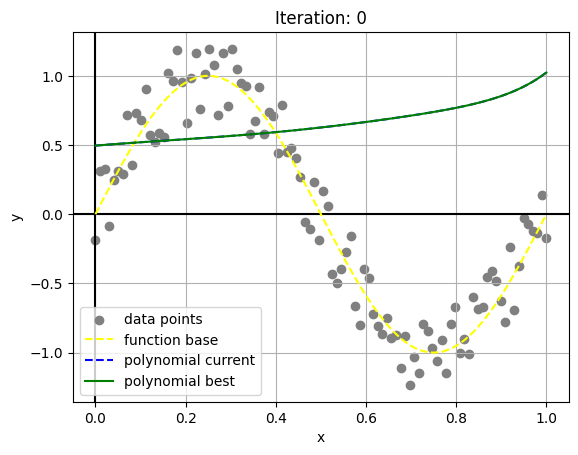

In [19]:
print('\033[92m' + 'creating animation... ' + '\033[0m')
fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, frames=total_frames, interval=1000)
ani.save(f'reports/{report_number}/animation.mp4', writer='ffmpeg')